## Import Packages

In [1]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

## Import Data

In [2]:
YouTube = pd.read_csv('/Users/britfathi/Downloads/YouTubeChannels_Python.csv')

In [3]:
YouTube.head()

,Rank,Gr2de,Channel name,Video Uploads,Subscribers,Video views
0,1st,0,Zee TV,82757,18752951,20869786591
1,2nd,0,T-Series,12661,61196302,47548839843
2,3rd,0,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,0,SET India,27323,31180559,22675948293
4,5th,0,WWE,36756,32852346,26273668433


## Wrangle 

In [4]:
## Keep only Gr2de and Video Views  ### I don't think this is necessary and keeps on getting in the way. 
YouTube1 = YouTube[['Gr2de', 'Video views']]

In [6]:
YouTube1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Gr2de        5000 non-null   int64
 1   Video views  5000 non-null   int64
dtypes: int64(2)
memory usage: 78.2 KB


### Grade needs to become a letter grade for the ANOVA (can't be two continuous variables)

In [10]:
def recode (series):
    if series == 0: 
        return "A plus plus"
    if series == 1: 
        return "A plus"
    if series == 2: 
        return "A"
    if series == 3: 
        return "B"
    
YouTube['GradeR'] = YouTube['Gr2de'].apply(recode)
    

In [11]:
YouTube.head()

,Rank,Gr2de,Channel name,Video Uploads,Subscribers,Video views,GradeR
0,1st,0,Zee TV,82757,18752951,20869786591,A plus plus
1,2nd,0,T-Series,12661,61196302,47548839843,A plus plus
2,3rd,0,Cocomelon - Nursery Rhymes,373,19238251,9793305082,A plus plus
3,4th,0,SET India,27323,31180559,22675948293,A plus plus
4,5th,0,WWE,36756,32852346,26273668433,A plus plus


In [12]:
# Check for Normality

/var/folders/t5/4lqy4g_n1z14zq1k52ld2cx00000gn/T/ipykernel_41519/410504450.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(YouTube['Video views'])


<Axes: xlabel='Video views', ylabel='Density'>

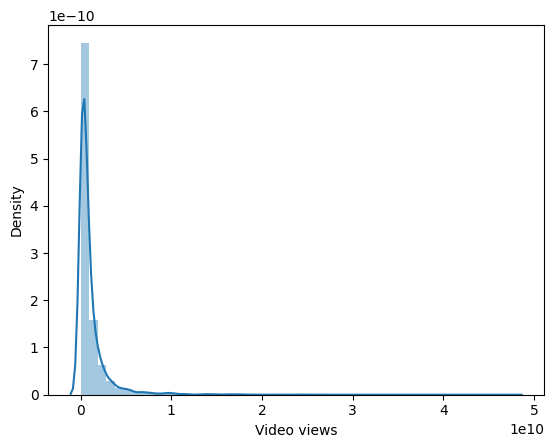

In [13]:
sns.distplot(YouTube['Video views'])

/var/folders/t5/4lqy4g_n1z14zq1k52ld2cx00000gn/T/ipykernel_41519/372728438.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(YouTube['VideoviewsCBRT'])


<Axes: xlabel='VideoviewsCBRT', ylabel='Density'>

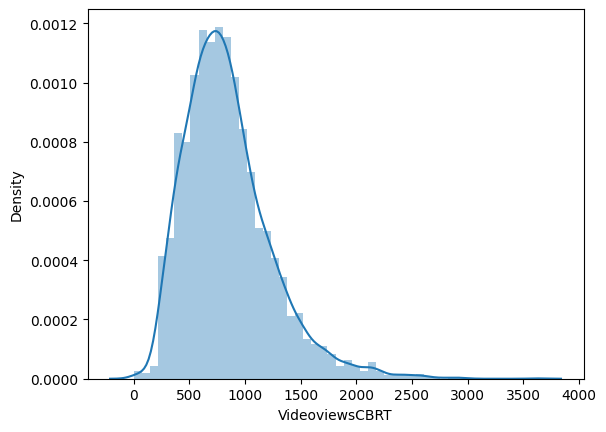

In [14]:
## Trying a cube root
YouTube['VideoviewsCBRT']= np.cbrt(YouTube['Video views'])
sns.distplot(YouTube['VideoviewsCBRT'])

## *Looks closer than before, so I'll use it

# Check for Homogeneity of Variance

In [17]:
scipy.stats.bartlett(YouTube['VideoviewsCBRT'], YouTube['Gr2de'])

BartlettResult(statistic=59336.960555271195, pvalue=0.0)

In [18]:
scipy.stats.fligner(YouTube['VideoviewsCBRT'], YouTube['Gr2de'])

FlignerResult(statistic=6239.295243313018, pvalue=0.0)